<br><br>
<div style="text-align: center">
<span style="color:black; font-size:50px; font-family: Cambria; text-align: center"><b><i>MultipathLocationEstimator</i> tutorials</b></span>
<br><br>
</div>

<span style=" font-size:19px; font-family: Calibri"><i>MultipathLocationEstimator</i> is an open-source Python class for link-level simulations over 5G digital communication systems, which contains several estimation algorythms for UE <b>(User Equipment)</b> positioning.
</span>

<span style=" font-size:19px; font-family: Calibri">The official documentation can be found <a href="https://github.com/gomezcuba/py5g/blob/dev-locator/MultipathLocationEstimator.py"><u>here</u></a>
</span>

<span style=" font-size:19px; font-family: Calibri">
To understand the use of this class, it has been created two jupyter notebooks that provides different examples of implementation of the system, from the simplest case to the hardest.
Futhermore, this work is structurated in:
</span>

<span style=" font-size:20px; font-family: Calibri">1. <a href=https://github.com/gomezcuba/py5g/blob/dev-locator/Tutorial_1_MultipathLocationEstimator.ipynb>First tutorial: Getting Started with <i>MultipathLocationEstimator</i></a>
</span>

<span style=" font-size:25px; font-family: Calibri"><b>2. <a href="#A">Second tutorial <i>MultipathLocationEstimator</i>, estimation algorythms</a></b>
</span>
<br><br><br>

<span name="abajo" style="color:black; font-size:33px; font-family: Cambria"><b>First tutorial: Getting Started with  <i>MultipathLocationEstimator</i></b>
</span>

<span style=" font-size:19px; font-family: Calibri">This first tutorial is focused in understanding the definition of the channel parameters between the BS (<b>Base Station</b>) and the UE. In other words, how it is established the coordinates and geometric system without going into detail in how the user position is computed.
</span>
<br><br>

<span style=" font-size:33px; font-family: Cambria"><b>Table of Contents:</b></span>
<br>

<div style = "text-indent: 30px">
    
<span style=" font-size:20px; font-family: Calibri; text-indent: 30px">1. <a href="#1.-Problem-statement">Problem statement</a>
</span>
        
<span style=" font-size:20px; font-family: Calibri">2. <a href="#2.-Geometric-system-representation">Geometric system representation</a>
</span>

<div style = "text-indent: 60px">
    
<span style=" font-size:20px; font-family: Calibri">2.1 <a href="#A">One multipath ray</a>
</span>
    
<span style=" font-size:20px; font-family: Calibri">2.2 <a href="#2.2-Constant-offset-error-model">Constant offset error model</a>
</span>

<div style = "text-indent: 90px">

<span style=" font-size:20px; font-family: Calibri">2.2.1 <a href="#B">One multipath ray with random offset orientation</a>
</span>

<span style=" font-size:20px; font-family: Calibri">2.2.2 <a href="#C">N multipath ray with random offset orientation</a>
</span>

<div style = "text-indent: 30px">

<span style=" font-size:20px; font-family: Calibri">3. <a href="#References">References</a>
</span>   
<br><br>

<a class="anchor" id="1.-Problem-statement"></a>
<span style="color:black; font-size:33px; font-family: Calibri"><b>1. Problem statement</b></span><br>

<span style=" font-size:19px; font-family: Calibri">The main goal of the <i>MultipathLocationEstimator</i> class is try to recover the UE position trigonometrically, define as ($d_{0x}$, $d_{0y}$), estimating the value of the <b>UE offset orientation</b> ($\phi_0$) from the knowledge of the set of the $AoD$ (<b>Angles Of Departure</b>) , $AoA$ (<b>Angles Of Arrival</b>) and <b>delays</b> introduced by the multipath channels.
</span>
<br>

<a class="anchor" id="Figure"></a>

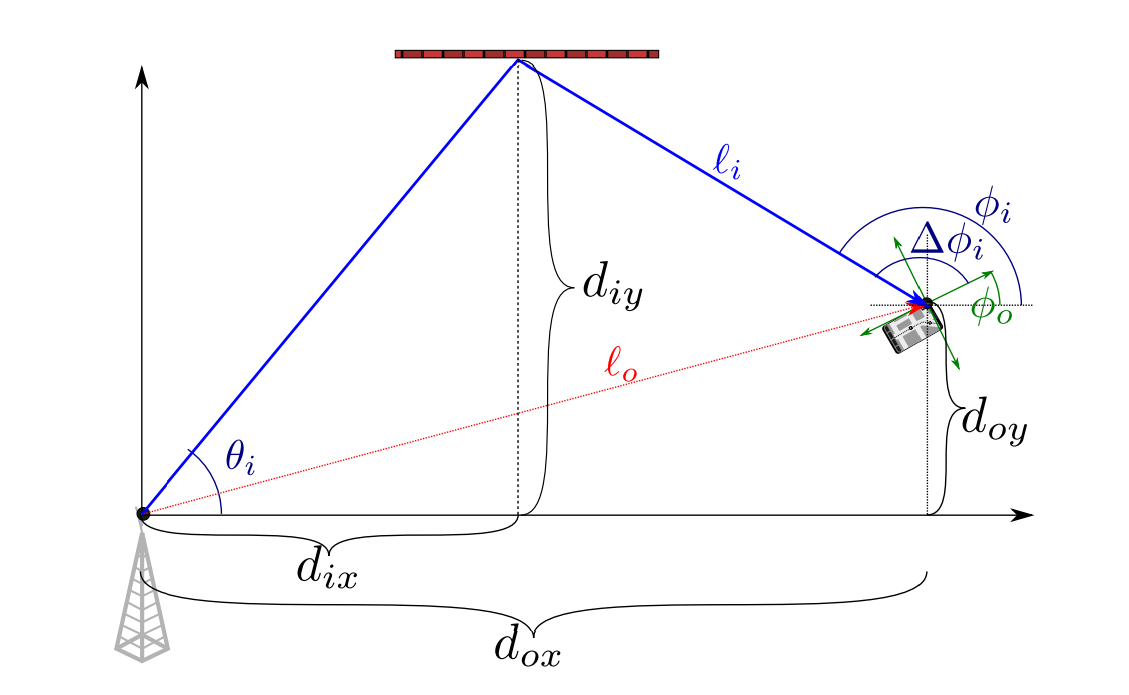

<span style=" font-size:19px; font-family: Calibri">The figure above shows a simple example of the teorical implementation of the problem. In this case the UE position is recovery with just using one scatter, that simulates one multipath channel in one of the two ray propagation paths. Moreover, the BS will be used as reference plane with coordinates $[0,0]$.</span>

<span style=" font-size:19px; font-family: Calibri">In our reference system we are going to define two types of paths:</span>

<div style = "text-indent: 30px">
<div style = "background-color:#D0ECE7 ">

<br>

<span style=" font-size:19px; font-family: Calibri">-> <i><b>LOS</b> path</i>: line of sigth propagation path.</span>
<br><br>
    
<span style=" font-size:19px; font-family: Calibri">-> <i><b>NLOS</b> path</i>: non line of sigth propagation path, which contains one scatter.</span>
<br><br>
    
</div>
</div>

<br>
<span style=" font-size:19px; font-family: Calibri">The constrains and terminology used to describe the channel parameters along the notebooks are:</span>

<div style = "text-indent: 30px">
<div style = "background-color:#D0ECE7 ">
<br>

<span style=" font-size:19px; font-family: Calibri">-> <i>$\pmb{\theta_i}$ (theta_i)</i> : angle of departure of the NLOS path from the BS.</span>
<br><br>
    
<span style=" font-size:19px; font-family: Calibri">-> <i>$\pmb{\theta_0}$ (theta_0)</i> : angle of departure of the LOS path from the BS.</span>
<br><br>
    
<span style=" font-size:19px; font-family: Calibri">-> <i>$\pmb{\phi_i}$ (phi_i)</i> : angle of arrival of the NLOS ray at the UE.</span>
<br><br>
   
<span style=" font-size:19px; font-family: Calibri">-> <i>$\pmb{\phi_0}$ (phi_0) </i> : offset angle orientation, measured in the UE from the x-axis in the non-clockwise sense.</span>
<br><br>
    
<span style=" font-size:19px; font-family: Calibri">-> <i>$\pmb{d_{ix}}$ (d_ix) </i> : coordinate x of a random scatter.</span><br><br>
    
<span style=" font-size:19px; font-family: Calibri">-> <i>$\pmb{d_{iy}}$ (d_iy) </i> : coordinate y of a random scatter.</span><br><br>
    
<span style=" font-size:19px; font-family: Calibri">-> <i>$\pmb{d_{0x}}$ (d_0x) </i> : coordinate x of a random UE.</span>
<br><br>
    
<span style=" font-size:19px; font-family: Calibri">-> <i>$\pmb{d_{0y}}$ (d_0y) </i> : coordinate y of a random UE.</span>
<br><br>
    
<span style=" font-size:19px; font-family: Calibri">-> <i>$\pmb{l_0}$ (l_0) </i> : LOS path lenth.</span>
<br><br>
   
<span style=" font-size:19px; font-family: Calibri">-> <i>$\pmb{l_i}$ (l_i) </i> : NLOS path length.</span>
<br><br>
    
<span style=" font-size:19px; font-family: Calibri">-> <i><b> AoA </b></i>: Angle Of Arrival of the NLOS path, mesured in the UE from the positive x-axis in the non-colckwise sense till the
</span>
    
<span style=" font-size:19px; font-family: Calibri">NLOS path propagation. The value of $\phi_0$ can applies offset orientation.</span>
<br><br>
        
<span style=" font-size:19px; font-family: Calibri">-> <i><b> AoD </b></i>: Angle Of Departure of the NLOS path, mesured in the BS from the positive x-axis in the non-colckwise sense till</span>

<span style=" font-size:19px; font-family: Calibri">the NLOS path propagation.</span>
<br><br>

<span style=" font-size:19px; font-family: Calibri">-> <i>$\pmb{\tau_0}$ (tau_0) </i>: signal delay propagation measured in the LOS path signal propagation.</span>
<br><br>

<span style=" font-size:19px; font-family: Calibri">-> <i>$\pmb{\tau_i}$ (tau_i) </i>: signal delay propagation measured in the NLOS path signal propagation.</span>
<br><br>

<span style=" font-size:19px; font-family: Calibri">-> <i><b> dels </b></i>: set of the delays in the NLOS path propagation.</span>
<br><br>

<span style=" font-size:19px; font-family: Calibri">-> <i><b> c </b></i>: ligth speed (3e8 m/s) </span>
<br><br><br>
    
</div>
</div>

<br>
<span style=" font-size:19px; font-family: Calibri">We compute the sets of angles $\theta_0$, $\theta_i$ and $\phi_i$ as:</span>

<div style = "background-color:#FFF4A3 ; font-size:18px ">
<br>
    
\begin{equation}
\theta_0 = arctan\left(\frac{d_{0y}}{d_{0x}}\right)
\end{equation}

\begin{equation}
\theta_i = arctan\left(\frac{d_{iy}}{d_{ix}}\right)
\end{equation}

\begin{equation}
\phi_i = arctan\left(\frac{d_{iy}-d_{0y}}{d_{0x}-d_{ix}}\right)
\end{equation}
    
<br>

<br>
<span style=" font-size:19px; font-family: Calibri">And path lengths and delays as:</span>

<div style = "background-color:#FFF4A3; font-size:18px  ">
<br>
\begin{equation}
l_0 = \left(\frac{d_{0y}}{sin(\theta_0)}\right)
\end{equation}

\begin{equation}
\tau_0 = \left(\frac{l_0}{c}\right)
\end{equation}

\begin{equation}
l_i = \left(\frac{d_{iy}}{sin(\theta_i)}\right) + \left(\frac{d_{iy}-d_{0y}}{sin(\phi_i)}\right)
\end{equation}
    
\begin{equation}
\tau_i = \left(\frac{l_i}{c}\right)
\end{equation}
    
\begin{equation}
dels = \tau_i-\tau_0
\end{equation}
    
<br>
</div>

<br><br>

<span style="color:black; font-size:28px; font-family: Cambria"><b> In this first tutorial you will learn how to: </b></span>
<br>

<div style = "text-indent: 30px">

<span style=" font-size:19px; font-family: Calibri">1. Understand the problem of UE offset orientation.</span>
<br>
 
<span style=" font-size:19px; font-family: Calibri">2. Understand the relation between $AoA$ and $\phi_0$ parameters.</span>
<br>

<span style=" font-size:19px; font-family: Calibri">3. Generate random positions for the UE.</span>
<br>
    
<span style=" font-size:19px; font-family: Calibri">4. Generate random positions for the scatters</span>
<br>
   
<span style=" font-size:19px; font-family: Calibri">5. Obtain the value of channel parameters.</span>
<br>

<span style=" font-size:19px; font-family: Calibri">6. Plot the geometric system representation.</span>
<br><br><br>

<a class="anchor" id="2.-Geometric-system-representation"></a>

<span style="color:black; font-size:33px; font-family: Cambria"><b> 2. Geometric system representation </b></span>

<div style = "text-indent: 30px">

<span style=" font-size:19px; font-family: Calibri;">2.1 <a href="#A"> One multipath ray</a></span>

<a class="anchor" id="2.2-Constant-offset-error-model"></a>

<span style="color:black; font-size:28px; font-family: Cambria"><b> 2.2 Constant offset error model </b></span>
    
<span style=" font-size:19px; font-family: Calibri">In this notebook we introduce a “constant offset” error model for the estimation of some of the channel parameters. We have talked about $\phi_0$, but not about the rol it plays in our analysis.
<br><br>
Therefore, at first step, we have to compute the values of our positionning system trigonometrically to obtain receiver’s $\theta_i$, $\phi_i$, ..., the unkowns to compute $AoA$, $AoD$ and $dels$ parameters. 
In first place, Angle of Departure will be directly obtained trigonometrically from $\theta_i$ value.
\begin{equation}
AoD = \theta_i
\end{equation}
On the order hand, $AoA$ will not be as easy to compute. It's also directly related with the trigonometrically value of $\phi_i$, but we will need to estimate the value of $\phi_0$ which can affects $AoA$ measurement in UE with a random offset orientation with regard from the transmision system.
\begin{equation}
AoA = \phi_i -\phi_0
\end{equation}
For the last parameter, $dels$, we will talk more in the following tutorial where we introduce posible clock offset error present in channel propagation. For this tutorial, we compute dels value as the time ray propagation difference between LOS and NLOS paths.
\begin{equation}
dels = \tau_i -\tau_0
\end{equation}
Additionally, for this framework, the angle offset due to receiver orientation is the same for all paths. We do not model individual independent noise components in the angular measurements.
</span>

<div style = "text-indent: 30px">

<span style=" font-size:19px; font-family: Calibri">2.2.1 <a href="#B"> One multipath ray with random offset orientation</a></span>
<br>

<span style=" font-size:19px; font-family: Calibri">2.2.2 <a href="#C"> N multipath ray with random offset orientation</a></span>
<br>

<br><br><br>

<span style="color:black; font-size:25px; font-family: Cambria"><b> Imports & Basics: </b></span>


In [7]:
#Import to use NumPy arrays
import numpy as np

#Import to create folders to save the images
import os

#Import for making plots 
import matplotlib.pyplot as plt

from scipy.ndimage.interpolation import rotate

from mpl_toolkits import mplot3d

plt.rcParams["figure.figsize"] = (18, 18)

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [8]:
#Create folders to save plots
Folder_dir = "Figures"
Folder_tutorial_1_dir = "tutorial_1"
Root_dir = os.path.dirname(os.path.abspath("Tutorial_1_MultipathLocationEstimator.ipyb"))

Folder_dir_path = os.path.join(Root_dir, Folder_dir)
Folder_tutorial_1_dir_path = os.path.join(Folder_dir_path, Folder_tutorial_1_dir)

#Check if the folders doesn't exist
if not os.path.exists(Folder_dir_path):
    os.makedirs(Folder_dir_path)  #### this command for creating directory

if not os.path.exists(Folder_tutorial_1_dir_path):
    os.makedirs(Folder_tutorial_1_dir_path)  #### this command for creating directory

<a class="anchor" id="A"></a>

<br><br><br>
<span style="color:black; font-size:28px; font-family: Cambria" name ="A"><b> 2.1 One multipath ray
</b></span><br>

<span style=" font-size:19px; font-family: Calibri">For this first approach, we are going to replicate <a href="#Figure">theorical</a> system representation. With this aim, we generate one UE position $(d_{0x}, d_{0y})$ and $Npath × Nuser = 1×1$ reflectors locations $(d_{ix}, d_{iy})$, both randomly uniformly distributed in a square of size of $(100 * 100) m$ that simulates the map where UE, BS and scatter are placed. 
<br><br>
Moreover, we are going to plot $AoA$ and $AoD$ angles obtained following the explanation in <a href="#1.1">1.1 section</a>, but taking terminal orientation as $\phi_0 = 0$.   
</span>

<span style=" font-size:19px; font-family: Calibri">Therefore, we depict: </span>

<div style = "text-indent: 30px">
    
<span style=" font-size:19px; font-family: Calibri">-> One multipath channel.</span>
    
<span style=" font-size:19px; font-family: Calibri">-> One scatter.</span>
    
<span style=" font-size:19px; font-family: Calibri">-> One UE.</span>
    
<span style=" font-size:19px; font-family: Calibri; color:red">-> No offset orientation ($\phi_0 = 0$).</span>
<br><br>

In [9]:
# Number of scattering paths (number of scatters)
Npath = 1

# Number of total users allocatÇed in the plane
Nuser = 1

In [10]:
# We generate a random location for one user in a 100m [-50 y 50] square
d_0x = np.random.rand(Nuser)*100 - 50
d_0y = np.random.rand(Nuser)*100 - 50

print("d_0x = ",d_0x[0])
print("d_0y = ",d_0y[0])

d_0x =  -25.975497369204582
d_0y =  -23.716389015712725


In [11]:
# We generate Npath random locations for scatters in a 50m [-50 y 50] square
# We place one scatter in each NLOS path
d_ix = np.random.rand(Npath,Nuser)*100 - 50
d_iy = np.random.rand(Npath,Nuser)*100 - 50

print("d_ix = ",d_ix[0][0])
print("d_iy = ",d_iy[0][0])

d_ix =  -1.7688631741643448
d_iy =  -43.84307963204539


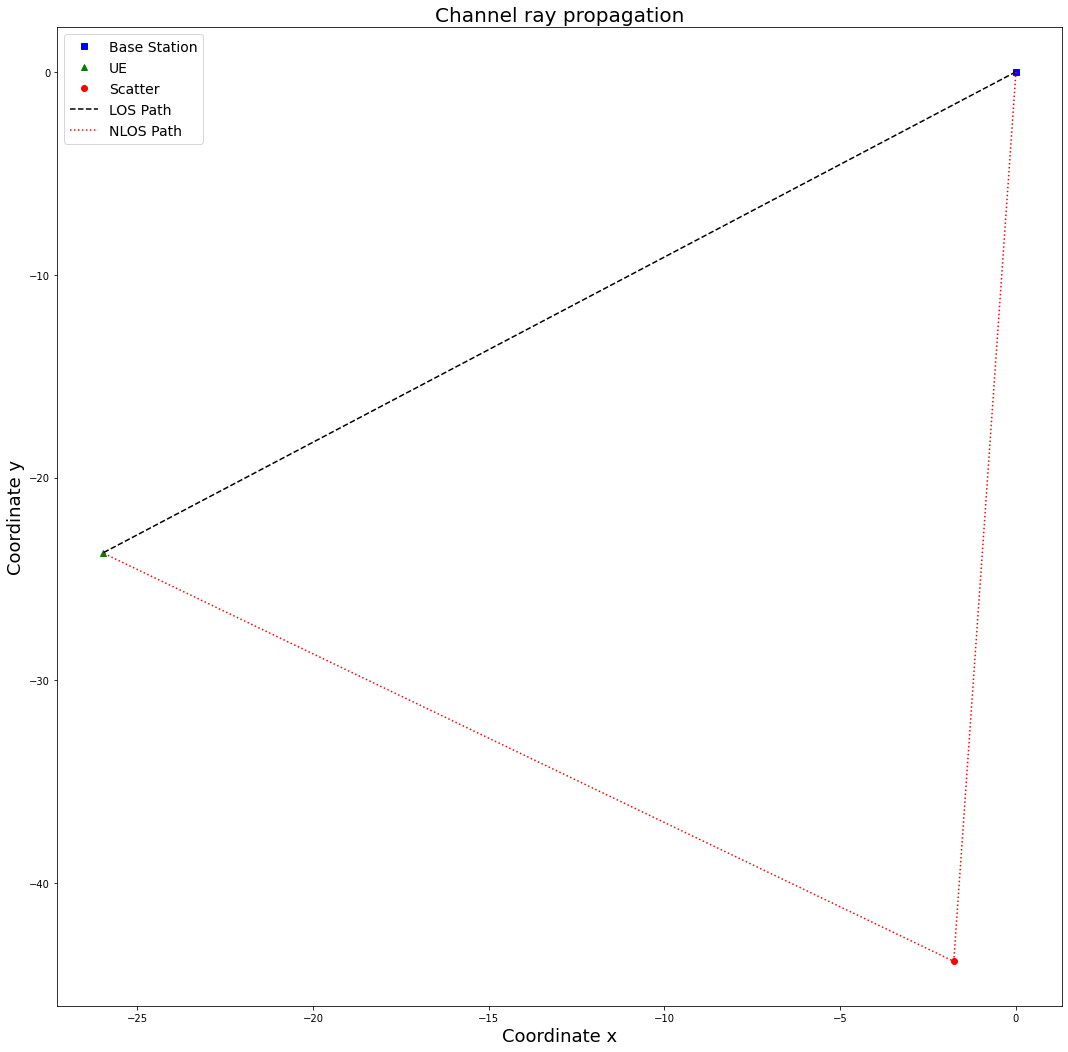

In [12]:
plt.figure(1)

# Plot the Base Station
plt.plot(0, 0, "sb", label="Base Station")

# Plot the user
plt.plot(d_0x, d_0y, "^g", label="UE")

# Plot the scatter
plt.plot(d_ix, d_iy, "or", label="Scatter")

# Plot LOS path
plt.plot([0,d_0x], [0,d_0y], "--k", label="LOS Path")

# Plot NLOS path
plt.plot([0,d_ix,d_0x], [0,d_iy,d_0y], ":r", label="NLOS Path")

plt.title("Channel ray propagation", fontsize=20)
plt.xlabel("Coordinate x", fontsize=18)
plt.ylabel("Coordinate y", fontsize=18)

# Make and plot legend
plt.legend(prop={"size": 14})

# Save Figure_2_1_A image
plt.savefig(Folder_tutorial_1_dir_path + "/Figure_2_1_A.png")

In [13]:
# All angles are in radians units
# With el mod operator, we substract 2pi from the angle if it is higher than 2pi
theta_0 = np.arctan(d_0y/d_0x)
theta_0 = np.mod(theta_0 + np.pi*(d_0x < 0), 2*np.pi)

theta_i = np.arctan(d_iy/d_ix)
theta_i = np.mod(theta_i + np.pi*(d_ix < 0), 2*np.pi)

phi_i = np.arctan((d_iy - d_0y)/(d_0x - d_ix))
phi_i = np.mod(np.pi - phi_i + np.pi*((d_0x - d_ix) < 0), 2*np.pi)

print("theta_0 = ",np.rad2deg(theta_0[0]), "º")
print("theta_i = ",np.rad2deg(theta_i[0][0]), "º")
print("phi_i = ",np.rad2deg(phi_i[0][0]), "º")

theta_0 =  222.39699336727568 º
theta_i =  267.6896363319474 º
phi_i =  320.2580523548605 º


In [14]:
AoD = np.mod(theta_i, 2*np.pi)

AoA = np.mod(phi_i, 2*np.pi)

print("AoD = ",np.rad2deg(AoD[0][0]), "º")
print("AoA = ",np.rad2deg(AoA[0][0]), "º")

AoD =  267.6896363319474 º
AoA =  320.2580523548605 º


In [15]:
# Ligth speed
c = 3e8

# LOS path length
l_0 = abs(d_0y/np.sin(theta_0))

# LOS path time delay
tau_0 = l_0/c

print("tau_0 = ",tau_0[0], "s")

tau_0 =  1.1724587514763693e-07 s


In [16]:
# NLOS path time delay
#l_i_1 = np.abs(d_iy / np.sin(theta_i))
#tau_i_1 = l_i_1 / c

l_i = np.abs(d_iy/np.sin(theta_i)) + np.abs((d_iy - d_0y)/np.sin(phi_i))
tau_i = l_i/c

print("tau_i = ",tau_i[0][0], "s")

tau_i =  2.511987068508275e-07 s


In [17]:
# Delay difference between LOS and NLOS paths
dels = tau_i - tau_0

print("delays = ",dels[0][0], "s")

delays =  1.3395283170319056e-07 s


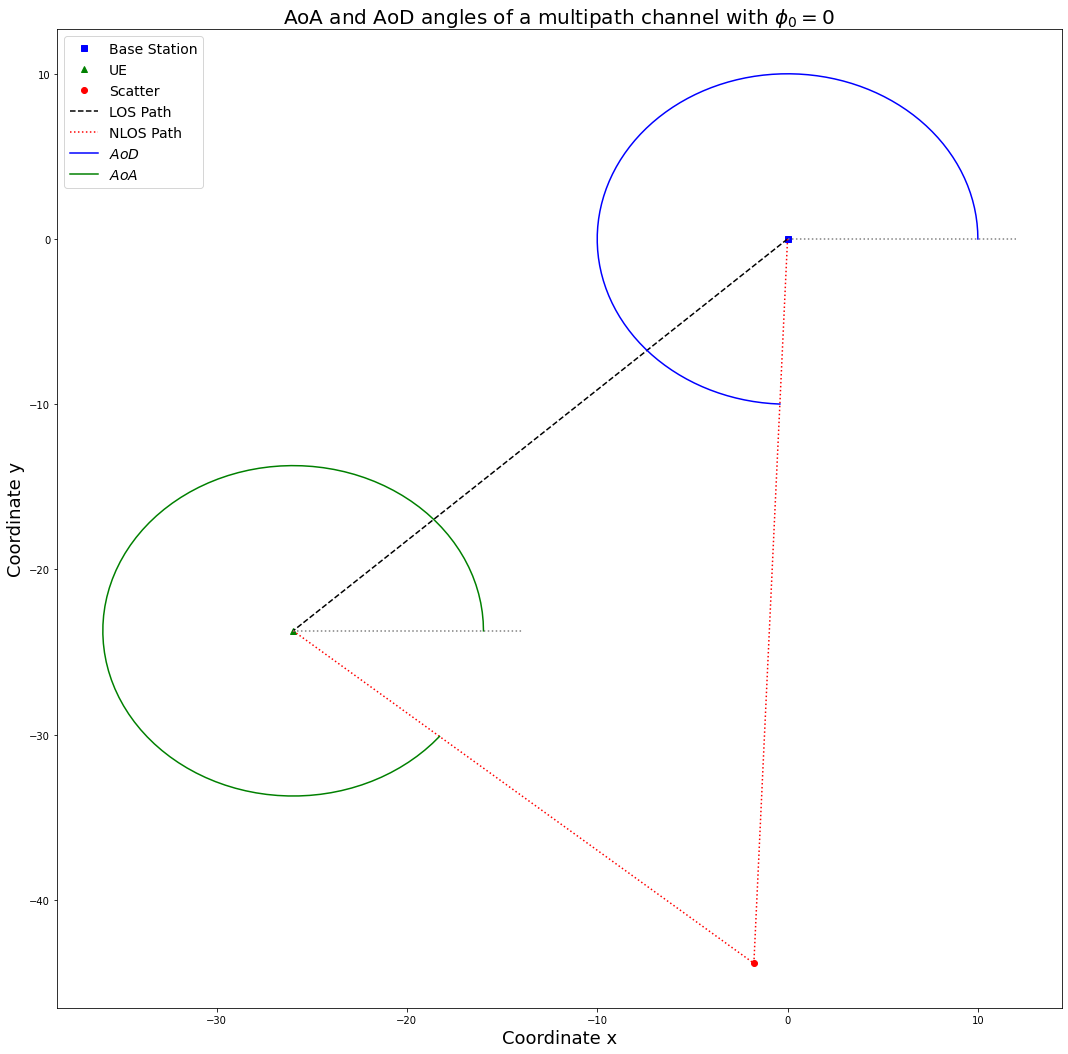

In [18]:
plt.figure(2)

# Plot the Base Station
plt.plot(0, 0, "sb", label="Base Station")

# Plot the user
plt.plot(d_0x, d_0y, "^g", label="UE")

# Plot the scatter
plt.plot(d_ix, d_iy, "or", label="Scatter")

# Plot LOS path
plt.plot([0,d_0x], [0,d_0y], "--k", label="LOS Path")

# Plot NLOS path
plt.plot([0,d_ix[0],d_0x], [0,d_iy[0],d_0y], ":r", label="NLOS Path")

# Number of points to draw angles circunferences and size respect each origin (Base Station or UE)
circle_points = 100
circle_scale = 10
t = np.linspace(0, 1, circle_points)

# Plot x axis reference line in the Base Station
plt.plot([0, circle_scale + 2], [0,0], ":", color="grey")

# Plot x axis reference line in the UE
plt.plot([d_0x, d_0x + circle_scale + Npath*2], [d_0y,d_0y], ":" ,color="grey")
 
# Plot AoD angle
plt.plot(0 + (circle_scale)*np.cos(AoD[0]*t), 0 + (circle_scale)*np.sin(AoD[0]*t), "b" ,label="$AoD$")

# Plot AoA angle
plt.plot(d_0x + (circle_scale)*np.cos((AoA[0])*t), d_0y + (circle_scale)*np.sin((AoA[0])*t), "g", label="$AoA$")
    
plt.title("AoA and AoD angles of a multipath channel with $\phi_0=0$", fontsize=20)
plt.xlabel("Coordinate x", fontsize=18)
plt.ylabel("Coordinate y", fontsize=18)

# Make and plot legend
plt.legend(prop={"size": 14})

# Save Figure_2_1_B image
plt.savefig(Folder_tutorial_1_dir_path + "/Figure_2_1_B.png")

<a class="anchor" id="B"></a>

<br><br>
<span style="color:black; font-size:28px; font-family: Cambria"><b> 2.2.1 One multipath ray with random offset orientation </b></span>
<br>

<span style=" font-size:19px; font-family: Calibri">In this second approach, we are going to take in account offset orientation error, generated randomly $\phi_0\sim U(0, 2\pi)$. The rest of parameters are kept identically regarding to the section above. We only have to recalculate $AoA$ for the new value of $\phi_0$.
</span>

<span style=" font-size:19px; font-family: Calibri">Therefore, we depict: </span>

<div style = "text-indent: 30px">

<span style=" font-size:19px; font-family: Calibri">-> One multipath channel.</span>
   
<span style=" font-size:19px; font-family: Calibri">-> One scatter.</span>
    
<span style=" font-size:19px; font-family: Calibri">-> One UE.</span>
   
<span style=" font-size:19px; font-family: Calibri; color:red">-> With offset orientation $\phi_0$.</span>
<br><br>

In [19]:
# We generate a random angle for UE offset
phi_0 = np.random.rand(1)*2*np.pi

print("phi_0 = ",np.rad2deg(phi_0[0]), "º")

phi_0 =  30.458124799135803 º


In [20]:
AoA = np.mod(phi_i - phi_0, 2*np.pi)

print("AoA = ",np.rad2deg(AoA[0][0]), "º")

AoA =  289.7999275557247 º


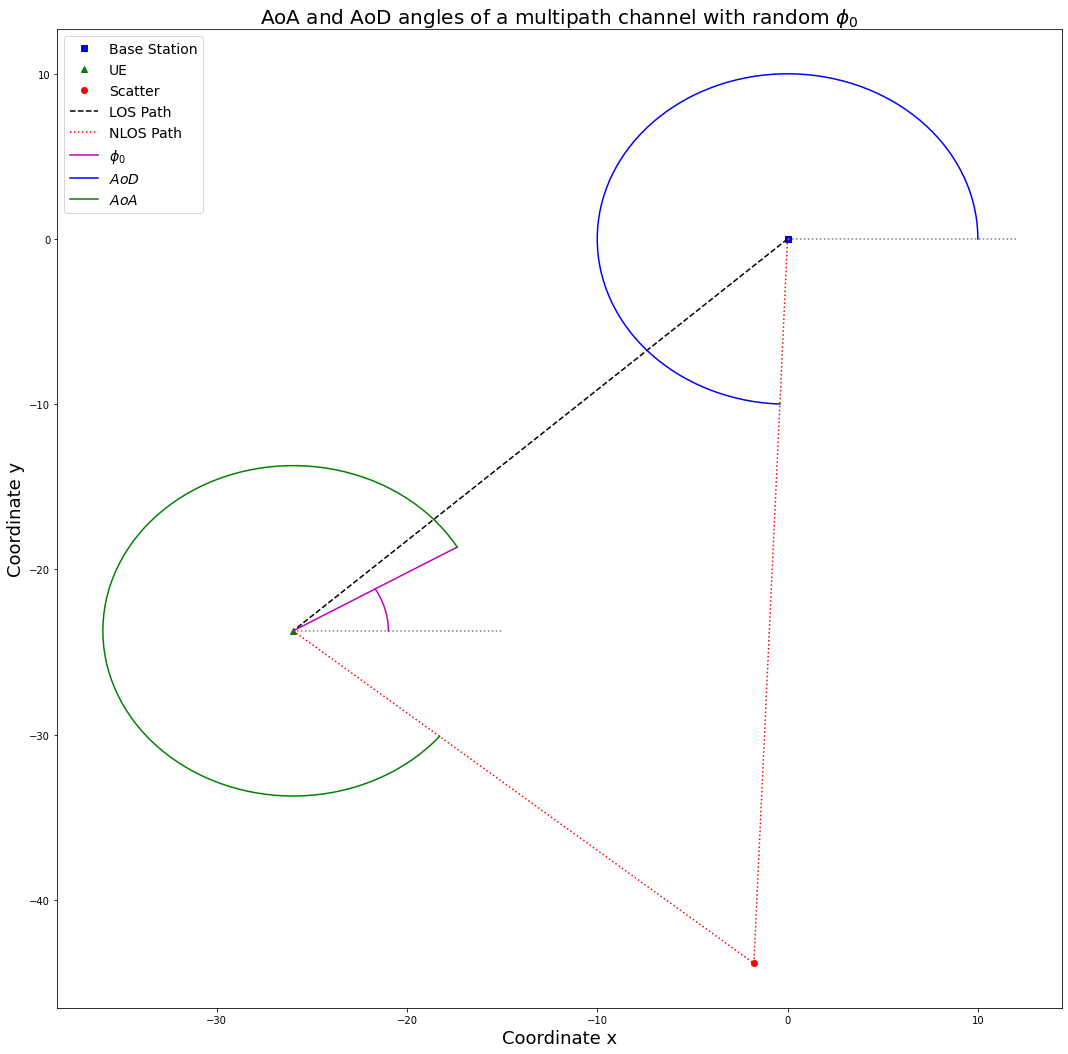

In [21]:
plt.figure(3)

# Plot the Base Station
plt.plot(0, 0, "sb", label="Base Station")

# Plot the user
plt.plot(d_0x, d_0y, "^g", label="UE")

# Plot the scatter
plt.plot(d_ix, d_iy, "or", label="Scatter")

# Plot LOS path
plt.plot([0,d_0x], [0,d_0y], "--k", label="LOS Path")

# Plot NLOS path
plt.plot([0,d_ix[0],d_0x], [0,d_iy[0],d_0y], ":r", label="NLOS Path")

# Number of points to draw angles circunferences and size respect each origin (Base Station or UE)
circle_scale = 10
circle_points = 100
t = np.linspace(0, 1, circle_points)

# Plot x axis reference lines
plt.plot([0, circle_scale + Npath*2], [0,0], ":", color="grey")
plt.plot([d_0x, d_0x + circle_scale + Npath], [d_0y,d_0y], ":", color="grey")

# Plot phi_0 reference line
plt.plot([d_0x, d_0x + np.cos(phi_0)*circle_scale], [d_0y, d_0y + np.sin(phi_0)*circle_scale], color="m")

# Plot phi_0 angle
plt.plot(d_0x + (circle_scale/2)*np.cos((phi_0)*t), d_0y + (circle_scale/2)*np.sin((phi_0)*t), color="m" ,label="$\phi_0$")

# Plot AoD angle
plt.plot(0 + (circle_scale)*np.cos(AoD[0]*t), 0 + (circle_scale)*np.sin(AoD[0]*t), color="b", label="$AoD$")

# Plot AoA angle
x = np.array([(circle_scale)*np.cos(AoA[0]*t)])
y = np.array([(circle_scale)*np.sin(AoA[0]*t)])

rotated = np.concatenate((x, y), axis=0)

newX = rotated[0,:] * np.cos(phi_0) - rotated[1,:] * np.sin(phi_0)
newY = rotated[0,:] * np.sin(phi_0) + rotated[1,:] * np.cos(phi_0)

plt.plot(d_0x + newX, d_0y + newY, color="g",label="$AoA$")

plt.title("AoA and AoD angles of a multipath channel with random $\phi_0$", fontsize=20)
plt.xlabel("Coordinate x", fontsize=18)
plt.ylabel("Coordinate y", fontsize=18)

# Make and plot legend
plt.legend(prop={"size": 14})

# Save Figure_2_2_1 image
plt.savefig(Folder_tutorial_1_dir_path + "/Figure_2_2_1.png")

<a class="anchor" id="C"></a>

<br><br>
<span style="color:black; font-size:28px; font-family: Cambria"><b> 2.2.2 N multipath rays with random offset orientation </b></span>
<br>

<span style=" font-size:19px; font-family: Calibri">For this last representation, we are going to generate one UE position $(d_{0x}, d_{0y})$ and $Npath × Nuser = 5×1$ reflector locations $(d_{ix}, d_{iy})$, both randomly uniformly distributed in a square of size of $(100 * 100) m$ following the same base as <a href="#2.1">section 2.1</a>, but adding offset orientation error.
</span>

<span style=" font-size:19px; font-family: Calibri">For this second approach, we depict:

<div style = "text-indent: 30px">

<span style=" font-size:19px; font-family: Calibri; color:red">-> N multipath channels.</span>
    
<span style=" font-size:19px; font-family: Calibri; color:red">-> N scatters.</span>
 
<span style=" font-size:19px; font-family: Calibri">-> One UE.</span>

<span style=" font-size:19px; font-family: Calibri; color:red">-> With offset orientation $\phi_0$.</span>
<br><br>

In [22]:
# Number of Multipath paths, also the number of scatters
Npath = 5

In [23]:
#We generate a random location for one user in a 100m [-50 y 50] square
d_0x = np.random.rand(Nuser)*100 - 50
d_0y = np.random.rand(Nuser)*100 - 50

In [24]:
#We generate Npath random locations for scatters in a 50m [-50 y 50] square
d_ix = np.random.rand(Npath,Nuser)*100 - 50
d_iy = np.random.rand(Npath,Nuser)*100 - 50

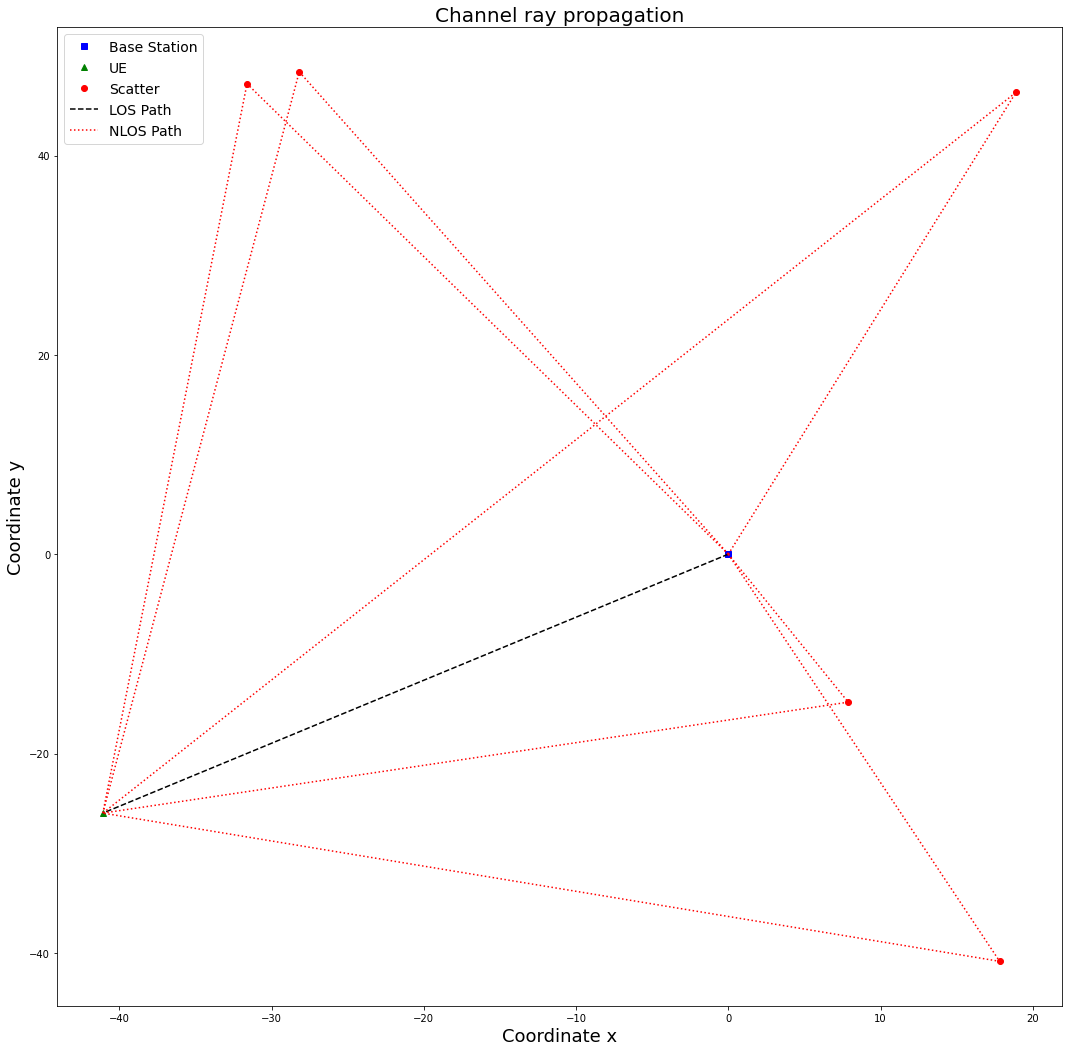

In [25]:
plt.figure(4)

# Plot the Base Station
plt.plot(0, 0, "sb", label="Base Station")

# Plot the user
plt.plot(d_0x, d_0y, "^g", label="UE")

# Plot the scatter
plt.plot(d_ix, d_iy, "or", label="Scatter")

# Plot LOS path
plt.plot([0,d_0x], [0,d_0y], "--k", label="LOS Path")

# Plot NLOS path
for p in range(Npath):
    plt.plot([0,d_ix[p],d_0x], [0,d_iy[p],d_0y], ":r", label="NLOS Path")    

plt.title("Channel ray propagation", fontsize=20)
plt.xlabel("Coordinate x", fontsize=18)
plt.ylabel("Coordinate y", fontsize=18)

# Create and avoid label repetitions in the legends
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), prop={"size": 14})

# Save Figure_2_2_2_A image
plt.savefig(Folder_tutorial_1_dir_path + "/Figure_2_2_2_A.png")

In [26]:
# All angles are in radians units
# With el mod operator, we substract 2pi from the angle if it is higher than 2pi
theta_0 = np.arctan(d_0y/d_0x)
theta_0 = np.mod(theta_0 + np.pi*(d_0x < 0), 2*np.pi)

theta_i = np.arctan(d_iy/d_ix)
theta_i = np.mod(theta_i + np.pi*(d_ix < 0), 2*np.pi)

phi_i = np.arctan((d_iy - d_0y)/(d_0x - d_ix))
phi_i = np.mod(np.pi - phi_i + np.pi*((d_0x - d_ix) < 0), 2*np.pi)

In [27]:
#We generate a random angle for UE offset
phi_0 = np.random.rand(1)*2*np.pi

print("phi_0 = ",np.rad2deg(phi_0[0]), "º")

phi_0 =  235.83115186365777 º


In [28]:
AoD = np.mod(theta_i, 2*np.pi)

AoA = np.mod(phi_i - phi_0, 2*np.pi)

In [29]:
# Ligth speed
c = 3e8

# LOS path length
l_0 = abs(d_0y/np.sin(theta_0))

# LOS path time delay
tau_0 = l_0/c

In [30]:
# NLOS path time delay
#l_i_1 = np.abs(d_iy / np.sin(theta_i))
#tau_i_1 = l_i_1 / c

l_i = np.abs(d_iy/np.sin(theta_i)) + np.abs((d_iy - d_0y)/np.sin(phi_i))
tau_i = l_i/c

In [31]:
# Delay difference between LOS and NLOS paths
dels = tau_i - tau_0

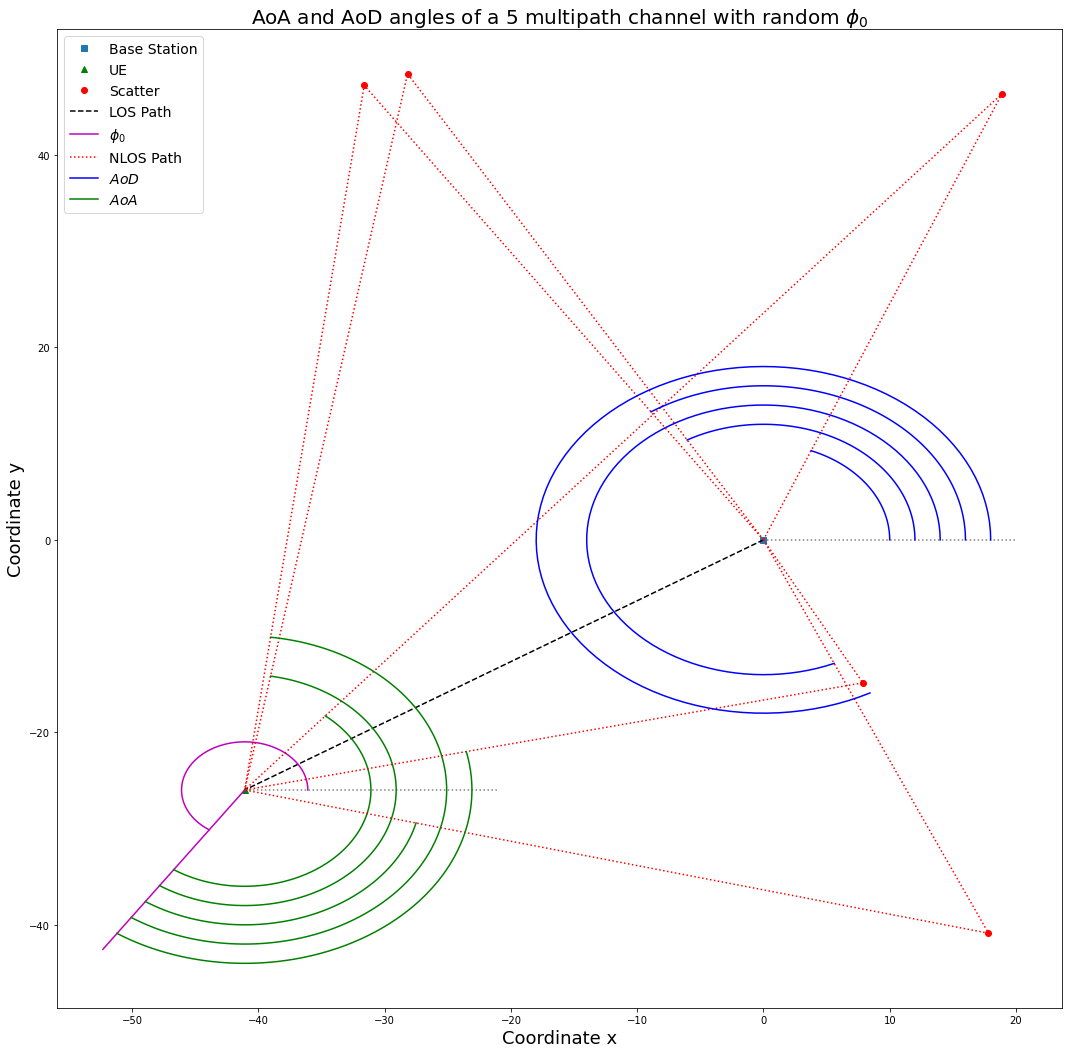

In [32]:
plt.figure(5)

# Plot the Base Station
plt.plot(0, 0, "s", label="Base Station")

# Plot the user
plt.plot(d_0x, d_0y, "^g", label="UE")

# Plot the scatter
plt.plot(d_ix, d_iy, "or", label="Scatter")

# Plot LOS path
plt.plot([0,d_0x], [0,d_0y], "--k", label="LOS Path")

# Number of points to draw angles circunferences and size respect each origin (Base Station or UE)
circle_scale = 10
circle_points = 100
t = np.linspace(0, 1, circle_points)

# Plot x axis reference lines
plt.plot([0, circle_scale + Npath*2], [0,0], ":", color="grey")
plt.plot([d_0x, d_0x + circle_scale + Npath*2], [d_0y,d_0y], ":", color="grey")

# Plot phi_0 reference line
plt.plot([d_0x, d_0x + np.cos(phi_0)*(circle_scale+Npath*2)], [d_0y, d_0y + np.sin(phi_0)*(circle_scale+Npath*2)], color="m")

# Plot phi_0 angle
plt.plot(d_0x + (circle_scale/2)*np.cos((phi_0)*t), d_0y + (circle_scale/2)*np.sin((phi_0)*t), color="m", label="$\phi_0$")


for p in range(Npath):
    
    # Plot NLOS paths
    plt.plot([0,d_ix[p],d_0x], [0,d_iy[p],d_0y], ':r', label="NLOS Path")
    
    # Plot AoD angles
    plt.plot(0 + (circle_scale + p*2)*np.cos(AoD[p]*t), 0 + (circle_scale + p*2)*np.sin(AoD[p]*t), color="b", label="$AoD$")
    
    # Plot AoA angles
    x = np.array([(circle_scale + p*2)*np.cos(AoA[p]*t)])
    y = np.array([(circle_scale + p*2)*np.sin(AoA[p]*t)])
    
    rotated = np.concatenate((x, y), axis=0)
    
    newX = rotated[0,:] * np.cos(phi_0) - rotated[1,:] * np.sin(phi_0)
    newY = rotated[0,:] * np.sin(phi_0) + rotated[1,:] * np.cos(phi_0)
    
    plt.plot(d_0x + newX, d_0y + newY, color="g", label="$AoA$")

plt.title("AoA and AoD angles of a " + str(Npath) + " multipath channel with random $\phi_0$", fontsize=20)
plt.xlabel("Coordinate x", fontsize=18)
plt.ylabel("Coordinate y", fontsize=18)

# Create and avoid label repetitions in the legends
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), prop={"size": 14})

# Save Figure_2_2_2_B image
plt.savefig(Folder_tutorial_1_dir_path + "/Figure_2_2_2_B.png")

<span style="color:black; font-size:33px; font-family: Cambria"><b> 3. References </b></span>
<br>
<a class="anchor" id="References"></a>

[1] Felipe Gomez-Cuba. Multipath absolute clock recovery and location. page 12.

[2] Felipe Gómez-Cuba, Nuria González-Prelcic, and Gonzalo Feijoo Rodríguez. Clock and orientation-robust location and mapping from multipath channel estimation. page 6.